# 4-2A
## 1981-1990年澳大利亞政府季度消費支出拟合
### table_a1.16.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.api as sm

## 画时序图，ACF，PACF

In [2]:
def drawer(series):
    plt.figure(figsize=(10,8))
    timeseries = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    acf = plt.subplot2grid((2, 2), (1, 0))
    pacf = plt.subplot2grid((2, 2), (1, 1))

    timeseries.plot(series, '*-')
    timeseries.set_title("Analysis")
    smt.graphics.plot_acf(series, lags=None, ax=acf, alpha=0.05)
    smt.graphics.plot_pacf(series, lags=None, ax=pacf, alpha=0.05)

    plt.show()
    plt.close()

## 画比较图

In [10]:
def drawcompare(series, prediction):
    plt.plot(series, "*-", label='observe')
    plt.plot(prediction, label='fittes')
    plt.legend()
    plt.show()
    plt.close()

## 开始分析

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


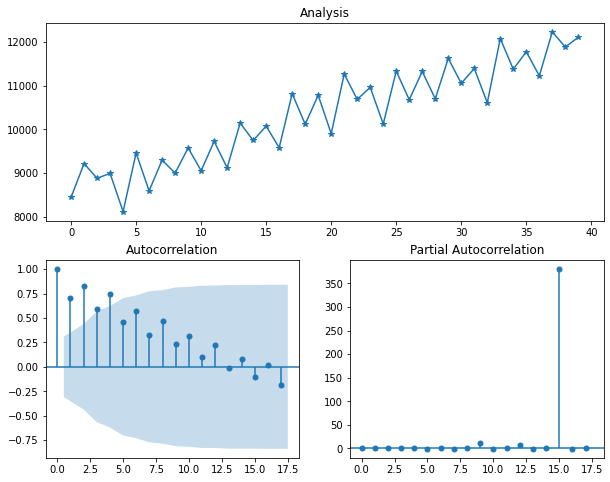

In [11]:
filename = "table_a1.16.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
drawer(series)

In [12]:
x = np.arange(1, len(series) + 1)
x2times = x ** 2

## 线性拟合T=a+bt 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     231.1
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           9.71e-18
Time:                        11:32:06   Log-Likelihood:                -298.09
No. Observations:                  40   AIC:                             600.2
Df Residuals:                      38   BIC:                             603.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8498.6885    137.917     61.622      0.0

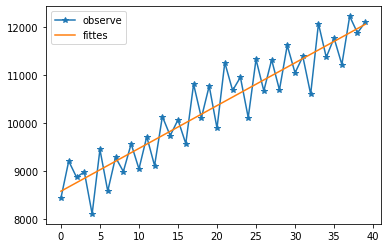

In [13]:
model = sm.OLS(series, sm.add_constant(x))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(x))
drawcompare(series, prediction)

## 曲线拟合T=a+bt^2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.3
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.34e-14
Time:                        11:32:11   Log-Likelihood:                -305.67
No. Observations:                  40   AIC:                             615.3
Df Residuals:                      38   BIC:                             618.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9203.9255    123.647     74.437      0.0

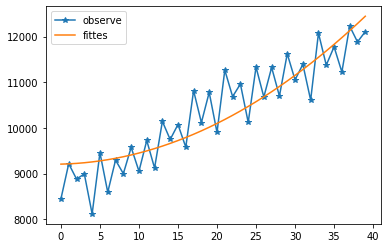

In [14]:
model = sm.OLS(series, sm.add_constant(x2times))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(x2times))
drawcompare(series, prediction)

## 曲线拟合T=a+bt=ct^2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.64e-16
Time:                        11:32:15   Log-Likelihood:                -297.95
No. Observations:                  40   AIC:                             601.9
Df Residuals:                      37   BIC:                             607.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8413.6885    215.692     39.008      0.0

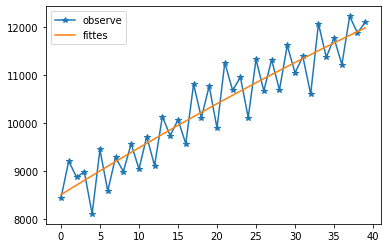

In [15]:
xx2times = np.c_[x, x2times]
model = sm.OLS(series, sm.add_constant(xx2times))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(xx2times))
drawcompare(series, prediction)